> exploration of the sample Ookla data in `test_data/inputs/tl/ookla_tl` and `test_data/inputs/tl/hdx_tl`


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
import povertymapping.ookla_data_proc as ookla

In [4]:
import sys

### Configuration 
> setup a  configuration object (which can be dictionary or any dict-like object)

The dhs configuration assumes a file structure like the following:

* These output files will be created

```
+ 
+save_path +
           + <ookla_feature_by_cluster>.csv  # the preprocessed ookla dataset 
                                             # with the mean <feature> per cluster
                                             # filename format: 
                                             # <country>_<year>_<quarter>_<feature>.csv
                                             # e.g. tl_2019_2_avg_d_mbps.csv
           + <ookla_feature_by_admin_bounds>.geojson # the preprocessed ookla data 
                                                     # with the mean <feature> per admin level
                                                     # (optional - created only 
                                                     # if `plot_ookla_features` flag 
                                                     # in config is True)
                                                     # filename format: 
                                                     # <country>_<year>_<quarter>_<feature>_by_<admin_level>
                                                     # <admin_level> uses `adm_level` 
                                                     # if `p_code` is True 
                                                     # else uses `shape_label`
           + <ookla_feature_by_admin_image>.jpeg # the preprocessed ookla data as an image
                                                 # with the mean <feature> per admin level
                                                 # (also optional same as the geojson file above)
```

* The input files are required:

```
+
+repo_path +
           + data_dir +
                      + ookla_folder +
                                     + ookla_geojson_file # name of filtered ookla data csv file 
                                                          # with the format 
                                                          # <country>_<year>_<quarter>_ookla.geojson 
                      + hdx_folder +
                                   + boundary_file_folder # name of the shape file folder 
                                                          # containing the admin boundaries
                                                          # inside this folder are the shape files 
                                                          # from HDX
                                                          # (optional - required if 
                                                          # `plot_ookla_features` in 
                                                          # config is True)
+save_path +
           + <dhs_geo_zip_folder>_cluster_coords.csv # the geotagged cluster data 
                                                     # created by process_dhs_data 
                                                     # for the given country
                                                     # the dhs_geo_zip_folder should 
                                                     # be the same as the one set
                                                     # for the config for dhs_process_data
        
```

In [5]:
ookla_config = dict(
        save_path="../test_data/test_outputs/ookla",
        repo_path="../test_data/inputs",
        data_dir="tl",
        country="tl",
        ookla_folder="ookla_tl",
        hdx_folder="hdx_tl",
        dhs_geo_zip_folder="TLGE71FL",
        crs="4683",
        ookla_feature="avg_d_mbps",
        boundary_file="new_suco_map",
        year="2019",
        quarter="2",
        sample=False,
        random_sample=False,
        no_samples=60,
        random_seed=42,
        clust_rad=2000,
        plot_ookla_features=True,
        adm_level=3,
        use_pcode=False,
        shape_label='SUCO_NUMCD',
        bins=6,
        show_legend=False,
    )

# you can also create a yaml file or json file
# and load it in.

Run the `process_ookla_data`, passing your config object

In [6]:
# uncomment and run the following to clear out the preprocessed files 
!rm -rf {ookla_config['save_path']}
!mkdir -p {ookla_config['save_path']}

In [7]:
!cp ../data/outputs/dhs_tl/{ookla_config['dhs_geo_zip_folder']}_cluster_coords.csv {ookla_config['save_path']}/.

In [8]:
%%time
ookla.process_ookla_data(ookla_config)

Adding buffer geometry...


100%|█████████████████████████████████████████████████████████████████████████████████| 455/455 [00:11<00:00, 39.69it/s]
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/povertymapping/utils/data_utils.py:449: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  geometry_and_cluster_features.groupby(group_indices).mean().reset_index()
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


CPU times: user 13.3 s, sys: 1.43 s, total: 14.7 s
Wall time: 13.9 s


<Figure size 1200x1000 with 0 Axes>

Check that the preprocessed files have been created

In [9]:
from pathlib import Path

In [11]:
ookla_df = pd.read_csv(Path(ookla_config['save_path'])/'tl_2019_2_avg_d_mbps.csv')

In [12]:
len(ookla_df)

28

In [13]:
ookla_df.head()

,Unnamed: 0,DHSID,avg_d_mbps
0,0,TL201600000173,1.104000
1,1,TL201600000174,2.075200
2,2,TL201600000176,1.104000
3,3,TL201600000179,3.279667
4,4,TL201600000181,3.105000


In [14]:
ookla_by_adm_gdf = gpd.read_file(Path(ookla_config['save_path'])/'tl_2019_2_avg_d_mbps_by_suco_numcd.geojson')

In [15]:
len(ookla_by_adm_gdf)

456

In [16]:
ookla_by_adm_gdf.head()

,SUCO_NUMCD,DHSYEAR,DHSCLUST,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,DHSREGCO,LATNUM,...,avg_d_mbps,index_right,REGIAO,DISTR_CODE,MUNI_NO_,SUBDS_CODE,POLYGON_HA,Shape_Leng,Shape_Area,geometry
0,60405,NaN,NaN,None,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((125.60983 -8.14371, 125.60988 -8.143..."
1,60403,NaN,NaN,None,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((125.59262 -8.16130, 125.59329 -8.161..."
2,60404,NaN,NaN,None,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((125.51124 -8.25234, 125.51274 -8.253..."
3,60402,NaN,NaN,None,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((125.56938 -8.24539, 125.56993 -8.244..."
4,60401,NaN,NaN,None,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((125.59583 -8.25395, 125.59715 -8.252..."


In [17]:
len(ookla_by_adm_gdf)

456

In [27]:
ookla_by_adm_gdf.avg_d_mbps.isna().sum()

432

In [30]:
with_data = ookla_by_adm_gdf[ookla_by_adm_gdf.avg_d_mbps.notna()][['SUCO_NUMCD','DHSCLUST','avg_d_mbps','geometry']]; 
with_data.head()

,SUCO_NUMCD,DHSCLUST,avg_d_mbps,geometry
59,60604,177.000000,2.104500,"POLYGON ((125.60584 -8.51985, 125.60585 -8.519..."
63,60606,191.800000,3.428391,"POLYGON ((125.60416 -8.54652, 125.60419 -8.546..."
71,60503,193.500000,6.245017,"POLYGON ((125.54797 -8.54527, 125.54792 -8.546..."
73,60501,198.000000,5.087806,"POLYGON ((125.54797 -8.54527, 125.54800 -8.545..."
74,60607,197.571429,3.860227,"POLYGON ((125.58711 -8.54789, 125.58717 -8.547..."


In [31]:
len(with_data)

24

In [38]:
orig_ookla_gdf = gpd.read_file(Path(ookla_config['repo_path'])/'tl'/'ookla_tl'/'tl_2019_2_ookla.geojson')

In [39]:
orig_ookla_gdf.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,ADM0_EN,ADM0_PCODE,ADM1_EN,...,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,POINT_X,POINT_Y,geometry
0,3101122101023021,4704,5886,21,24,9,198,Timor-Leste,TL,Dili,...,Dom Aleixo,TL0605,Kampung Alor,TL060502,None,None,None,125.561498,-8.550816,"POLYGON ((125.55527 -8.54877, 125.56077 -8.548..."
1,3101122101023123,2688,4930,50,67,14,167,Timor-Leste,TL,Dili,...,Nain Feto,TL0602,Gricenfor,TL060206,None,None,None,125.582836,-8.554380,"POLYGON ((125.57725 -8.55420, 125.58274 -8.554..."
2,3101122101023310,1104,901,44,86,2,63,Timor-Leste,TL,Dili,...,Nain Feto,TL0602,Bemori,TL060203,None,None,None,125.587389,-8.561463,"POLYGON ((125.58274 -8.55963, 125.58823 -8.559..."
3,3101122101023020,6505,8518,30,64,4,146,Timor-Leste,TL,Dili,...,Dom Aleixo,TL0605,Fatuhada,TL060501,None,None,None,125.553714,-8.550279,"POLYGON ((125.54978 -8.54876, 125.55527 -8.548..."
4,3101122101023033,2683,5667,34,18,14,101,Timor-Leste,TL,Dili,...,Vera Cruz,TL0601,Colmera,TL060105,None,None,None,125.572220,-8.555532,"POLYGON ((125.56626 -8.55420, 125.57175 -8.554..."


In [40]:
orig_ookla_gdf["avg_d_mbps"] = orig_ookla_gdf["avg_d_kbps"]/1000
orig_ookla_gdf["avg_u_mbps"] = orig_ookla_gdf["avg_u_kbps"]/1000

In [18]:
import matplotlib.pyplot as plt

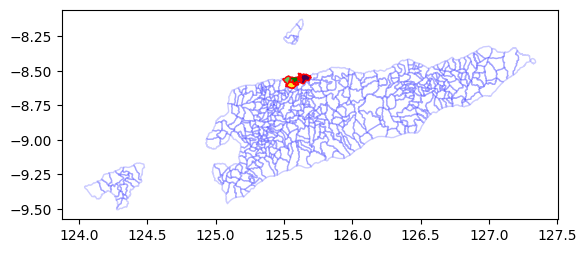

In [41]:
ax = plt.axes()
ax = ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='blue', alpha=0.2)
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='green', ax=ax)

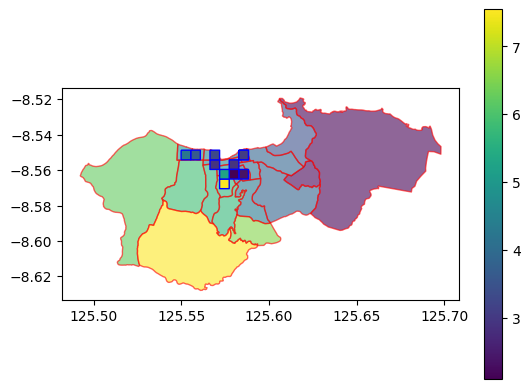

In [43]:
ax = plt.axes()
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax, legend=True, alpha=0.6)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='blue', ax=ax)

In [23]:
img_path = (Path(ookla_config['save_path'])/'new_suco_map_avg_d_mbps.jpeg').as_posix(); img_path

'../data/outputs/ookla/new_suco_map_avg_d_mbps.jpeg'

In [24]:
from PIL import Image

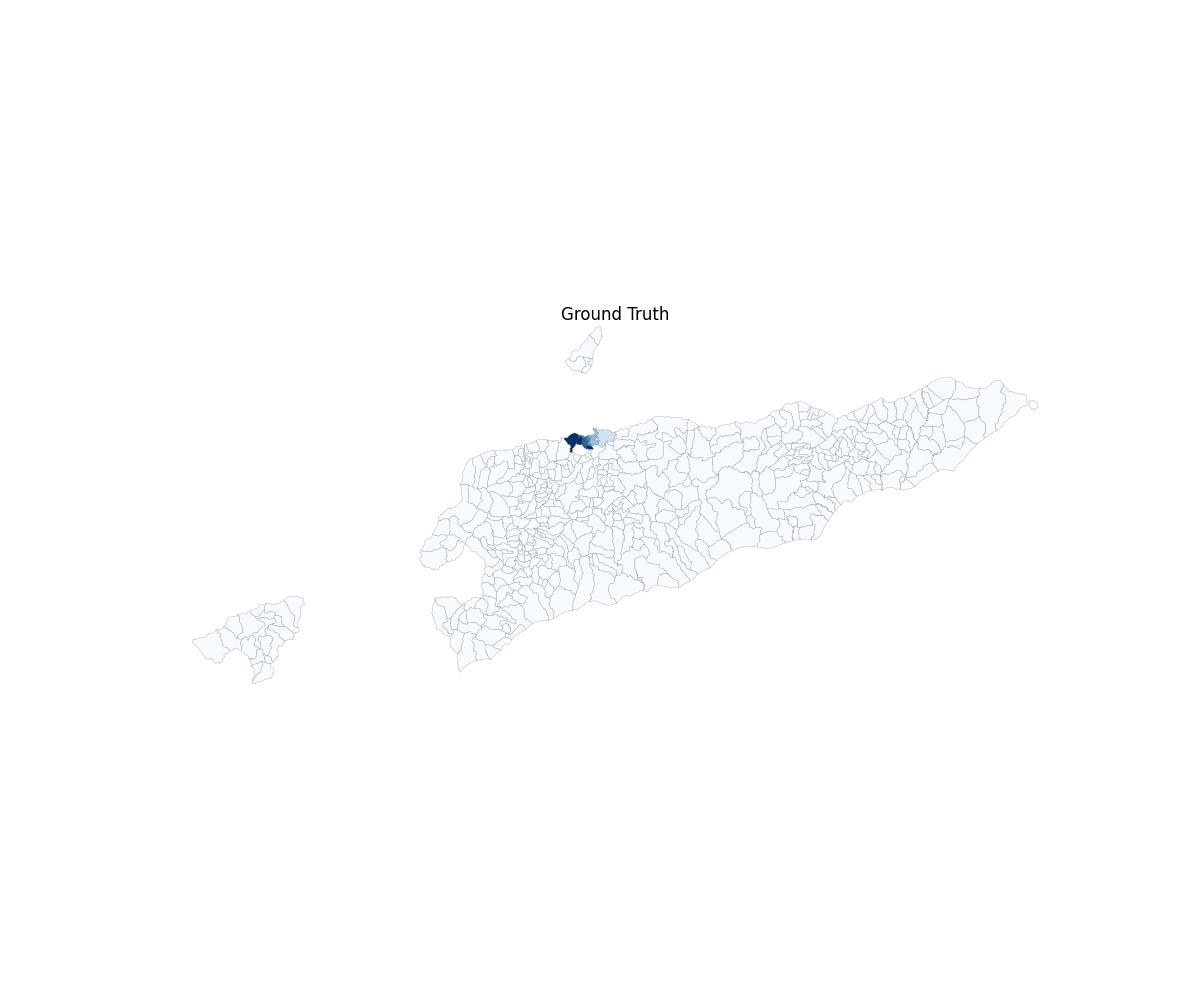

In [26]:
img = Image.open(img_path); img

In [44]:
dhs_by_cluster = gpd.read_file('../data/outputs/dhs_tl/TLHR71DT_TLGE71FL_by_cluster.geojson')

In [45]:
len(dhs_by_cluster)

455

In [46]:
dhs_by_cluster.columns.values

array(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA',
       'LATNUM', 'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'F21', 'F22',
       'F23', 'geometry'], dtype=object)

In [55]:
dhs_data = dhs_by_cluster[["DHSCLUST","DHSID","Wealth Index","geometry","LATNUM","LONGNUM"]].copy()
dhs_data.head()

,DHSCLUST,DHSID,Wealth Index,geometry,LATNUM,LONGNUM
0,1,TL201600000001,32166.600000,POINT (125.56738 -8.71202),-8.712016,125.567381
1,2,TL201600000002,-34063.923077,POINT (125.59022 -8.73023),-8.730226,125.590219
2,3,TL201600000003,39230.590909,POINT (125.55640 -8.74134),-8.741340,125.556399
3,4,TL201600000004,-82140.227273,POINT (125.53516 -8.81129),-8.811291,125.535161
4,5,TL201600000005,-56203.423077,POINT (125.47322 -8.79159),-8.791590,125.473219


In [49]:
dhs_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
from povertymapping.utils.data_utils import add_buffer_geom

In [56]:
add_buffer_geom(dhs_data, r=ookla_config['clust_rad'])

Adding buffer geometry...


100%|█████████████████████████████████████████████████████████████████████████████████| 455/455 [00:09<00:00, 46.76it/s]


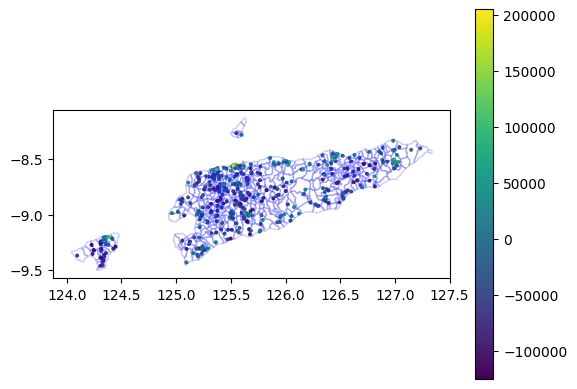

In [60]:
ax = plt.axes()
ax = dhs_data.plot(column="Wealth Index", ax=ax, legend=True)
ax= ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='blue', alpha=0.2)